In [68]:
#Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

from IPython.display import clear_output

import warnings
warnings.filterwarnings("ignore")

### Data

In [57]:
df=pd.read_csv("data/Lengkap.csv")
df.head()

,Unnamed: 0,Wilayah,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Stunting (%),IKP
0,0,aceh - aceh selatan,0.78,13.18,52.86,27.3,71.02
1,1,aceh - aceh tenggara,0.28,13.41,38.71,34.1,77.39
2,2,aceh - aceh timur,0.52,14.45,32.76,38.2,76.55
3,3,aceh - aceh tengah,2.57,15.26,28.92,34.3,63.93
4,4,aceh - aceh barat,0.56,18.81,38.49,27.4,77.56


In [58]:
df.describe()
df.isna().sum()     #No missing Value

Unnamed: 0                0
Wilayah                   0
NCPR                      0
Kemiskinan (%)            0
Pengeluaran Pangan (%)    0
Stunting (%)              0
IKP                       0
dtype: int64

In [59]:
X=df.copy()
label=X.pop("Wilayah")

### Exploration

### Clustering

Finding the exact number of cluster

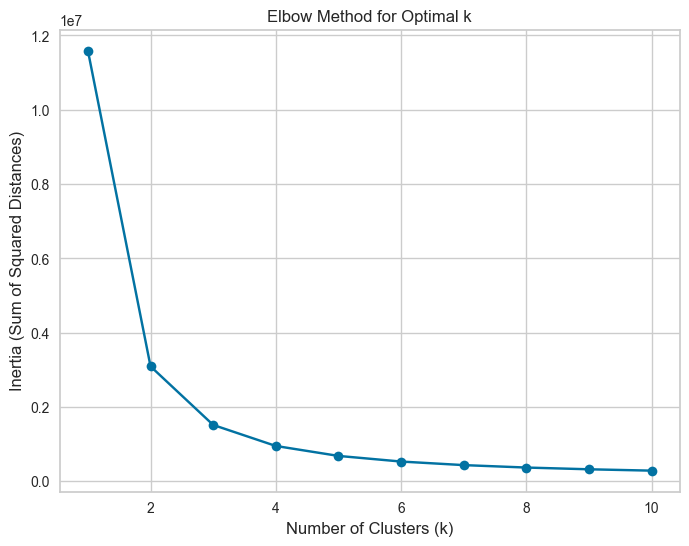

In [67]:
k_values = range(1, 11)
inertia_values = []

# Run k-means for each value of k and store the inertia (sum of squared distances to the closest cluster center)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

#3|4

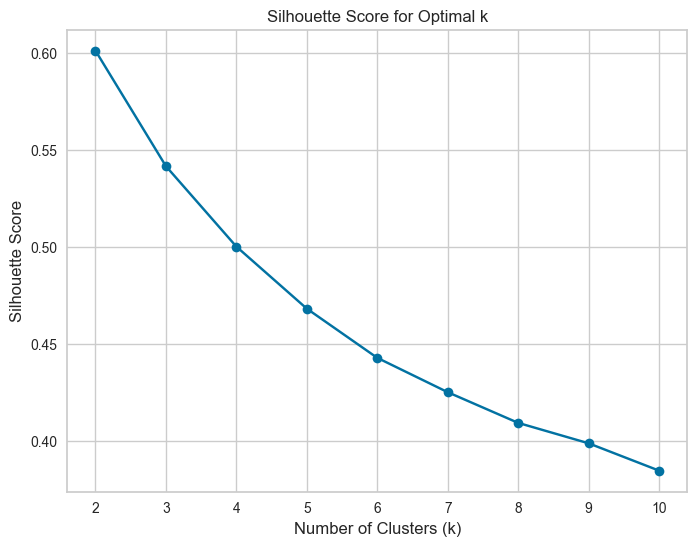

In [69]:
k_values = range(2, 11)
silhouette_scores = []

# Calculate silhouette scores for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()